In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/cocktail_dmlr/feature_importance')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from locomp import *
from locomp.MLmodels import *
import importlib
from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.model_selection import train_test_split
import itertools
from sklearn.ensemble import RandomForestRegressor
from functools import partial
import multiprocessing as mp
from sklearn.metrics import mean_absolute_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
import re

In [17]:
menu = pd.read_csv('/content/drive/MyDrive/cocktail_dmlr/Data/menu_cleaned.csv')

In [18]:
# Define old and new feature names
long_name = 'egg white (pasteurised) or aquafaba (chickpea water) or 3 dashes fee brothers fee foam cocktail foamer'
short_name = 'egg white (pasteurised)'

# Rename in both datasets
menu.rename(columns={long_name: short_name}, inplace=True)
#recipe.rename(columns={long_name: short_name}, inplace=True)

# Update ingredient column sets
ingredient_cols_menu = menu.columns.difference(['name', 'dg_rating', 'dd_rating'])
#ingredient_cols_recipe = recipe.columns.difference(['name', 'dg_rating', 'dd_rating'])

In [22]:
# Use dg_rating as target
X = menu.drop(columns=['name', 'dd_rating', 'dg_rating'], errors='ignore')
y = menu.loc[X.index, 'dg_rating']
X = X.to_numpy()
y = y.to_numpy()

In [23]:
J1 = 0
J2 = 1
m_ratio = 0.2
n_ratio = 0.2
B = 5000
fit_func = ridge2

In [24]:
x=LOCOMPReg(X,y,n_ratio,m_ratio,B,fit_func , selected_features=[],alpha=0.1,bonf=False)
x.run_loco()
#x.loco_ci

In [ ]:
ci_df = pd.DataFrame(x.loco_ci)
ci_df = ci_df.rename(columns={2: 'lower_bound', 3: 'upper_bound', 4: 'score'})
ci_df['feature_name'] = feature_names
fig_df = ci_df.nlargest(10, "score")

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(
    fig_df["feature_name"], fig_df["score"],
    yerr=[fig_df["score"] - fig_df["lower_bound"], fig_df["upper_bound"] - fig_df["score"]],
    fmt="o", capsize=5, capthick=2, markersize=6, color="b"
)
plt.axhline(y=0, color='r', linestyle='dotted')
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha = 'right')
plt.show()

In [ ]:
# Save to CSV
ci_df.to_csv('/content/drive/MyDrive/cocktail_NeurIPS/results/loco_importances_menu.csv', index=False)

# Bike Sharing LOCO Importance

In [ ]:
dat = pd.read_csv('/content/drive/MyDrive/cocktail_NeurIPS/big/hour.csv')
# Columns to one-hot encode
columns_to_encode = ['season','mnth','hr','holiday','weekday','workingday','weathersit', 'yr']

# One-hot encode using pandas (simpler for most cases)
dat_encoded = pd.get_dummies(dat, columns=columns_to_encode)

In [ ]:
# Prepare features (X) and target (y)
data = dat_encoded.copy()
data = data.dropna()
y = data['cnt']
X = data.drop(columns=['cnt', 'instant','dteday','casual','registered'], errors='ignore')
feature_names = X.columns.tolist()
X = X.to_numpy()
y = y.to_numpy()
feature_pairs = list(itertools.combinations(range(X.shape[1]), 2))


In [ ]:
x=LOCOMPReg(X,y,n_ratio,m_ratio,B,fit_func , selected_features=[],alpha=0.1,bonf=False)
x.run_loco()
#x.loco_ci

In [ ]:
ci_df = pd.DataFrame(x.loco_ci)
ci_df = ci_df.rename(columns={2: 'lower_bound', 3: 'upper_bound', 4: 'score'})
ci_df['feature_name'] = feature_names
fig_df = ci_df.nlargest(10, "score")

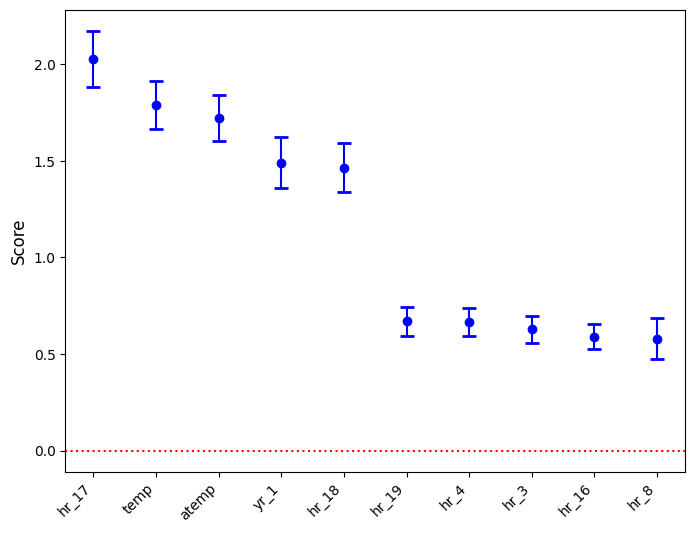

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(
    fig_df["feature_name"], fig_df["score"],
    yerr=[fig_df["score"] - fig_df["lower_bound"], fig_df["upper_bound"] - fig_df["score"]],
    fmt="o", capsize=5, capthick=2, markersize=6, color="b"
)
plt.axhline(y=0, color='r', linestyle='dotted')
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha = 'right')
plt.show()

In [ ]:
# Save to CSV
ci_df.to_csv('/content/drive/MyDrive/cocktail_NeurIPS/results/loco_importances_bike.csv', index=False)